# Задание 0 (1 балл)

Данные, которые нужно использовать для выполнения задания, возьмите [здесь](https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data).

Данные расположены в двух таблицах: **penguins_iter** и **penguins_size**. Для этой лабораторной работы вам понадобится только таблица **penguins_size**.

**penguins_size** содержит следующую информацию:
* `species`: вид, к которому относится пингвин
* `culmen_length_mm`: длина клюва
* `culmen_depth_mm`: глубина клюва
* `flipper_length_mm`: длина ласт
* `body_mass_g`: масса тела
* `island`: название острова, на котором пингвин обитает
* `sex`: пол пингвина



1. Загрузите файл с данными к себе на Гугл диск и подключите его в Google Colab через `mount.drive`.
2. Выведите общую статистику по всем числовым и нечисловым столбцам с помощью функции `describe()`.
3. Узнайте размеры датасета с помощью функции `shape`.
4. Выведите 4 первые строки датасета.

1.

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount("/content/drive", force_remount=True)
penguins_data = pd.read_csv("/content/drive/MyDrive/lab2module/penguins_size.csv")

Mounted at /content/drive


2.


In [ ]:
penguins_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


3.

In [ ]:
print("Lines: " + str(penguins_data.shape[0]))
print("Columns: " + str(penguins_data.shape[1]))

Lines: 344
Columns: 7


4.

In [ ]:
penguins_data.head(4)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


# Задание 1 (1 балл)

1. Узнайте, сколько видов пингвинов представлено в таблице.
2. Посчитайте долю пингвинов каждого вида.
3. Выведите количество пингвинов, обитающих на каждом из островов.

1.

In [ ]:
print("Types of species: " + str(penguins_data.species.nunique()))

Types of species: 3


2.

In [ ]:
for name in penguins_data.species.unique():
  count = penguins_data.species[penguins_data.species == name].count() / len(penguins_data)
  print(str(name) + " : " + str(count))

Adelie : 0.4418604651162791
Chinstrap : 0.19767441860465115
Gentoo : 0.36046511627906974


3.

In [ ]:
for island in penguins_data.island.unique():
  print(str(island) + " : " + str(penguins_data.species[penguins_data.island == island].count()))

Torgersen : 52
Biscoe : 168
Dream : 124


# Задание 2 (1 балл)

1. Найдите id пингвина с самым длинным клювом и с самым коротким. Выведите всю информацию о каждом из этих пингвинов в виде одной таблицы.
2. Посчитайте, насколько самый длинный клюв длиннее самого короткого.

1.

In [ ]:
max_lenght_index = int(penguins_data[penguins_data.culmen_length_mm == penguins_data.culmen_length_mm.max()].index[0])
min_lenght_index = int(penguins_data[penguins_data.culmen_length_mm == penguins_data.culmen_length_mm.min()].index[0])

penguins_data.iloc[[max_lenght_index, min_lenght_index]]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,MALE
142,Adelie,Dream,32.1,15.5,188.0,3050.0,FEMALE


2.

In [ ]:
penguins_data.culmen_length_mm.max() - penguins_data.culmen_length_mm.min()

27.5

# Задание 3 (1 балл)

1. Постройте корреляционную матрицу для значений столбцов `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g`. 
2. Результат покажите на тепловой карте (heatmap).

1.

In [ ]:
penguins_data.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


2.

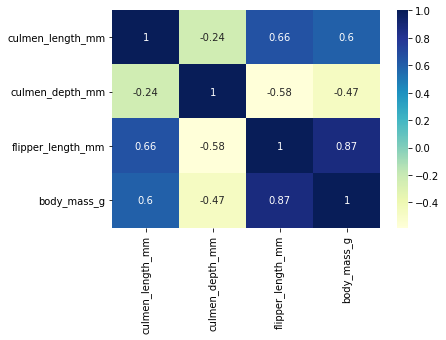

In [ ]:
import seaborn as sns
sns.heatmap(penguins_data.corr(), annot=True, cmap="YlGnBu")

# Задание 4 (2 балла)

1. О пингвинах какого вида в таблице больше всего недостающих данных? (Строк с `NaN`)
2. Какой информации о пингвинах чаще всего не хватает?

1.

In [ ]:
penguins_data.isnull().groupby([penguins_data.species]).sum().sum(axis=1).idxmax()
  

'Adelie'

2.

In [ ]:
penguins_data.isnull().sum().idxmax()

'sex'

# Задание 5 (2 балла)

1. По данным из таблицы узнайте, равномерно ли демографиески (процент мужских и женских особей) пингвины распределены по каждому из островов. Считаем, что равномерно, если разница составляет не более 3%.
2. Результат покажите на столбиковой диаграмме.

1.

In [ ]:
def get_percentage_diff(previous, current):
    try:
        percentage = abs(previous - current)/max(previous, current) * 100
    except ZeroDivisionError:
        percentage = float('inf')
    return percentage

female = "FEMALE"
male = "MALE"

filtered_data = penguins_data[penguins_data.sex != 'NaN']
filtered_data = penguins_data[penguins_data.sex != '.']

grouped_data = filtered_data.groupby(['island', 'sex']).size()

for island in penguins_data.island.unique():
  coeff = get_percentage_diff(int(grouped_data[island][female]), int(grouped_data[island][male]))
  if (coeff > 3):
    print("[-] " + str(island) + " : Пингвины распределены неравномерно. Коеффицент: " + str(coeff))
  else:
    print("[+] " + str(island) + " : Пингвины распределены равномерно. Коеффицент: " + str(coeff))

[-] Torgersen : Пингвины распределены неравномерно. Коеффицент: 4.166666666666666
[-] Biscoe : Пингвины распределены неравномерно. Коеффицент: 3.614457831325301
[+] Dream : Пингвины распределены равномерно. Коеффицент: 1.6129032258064515


2.

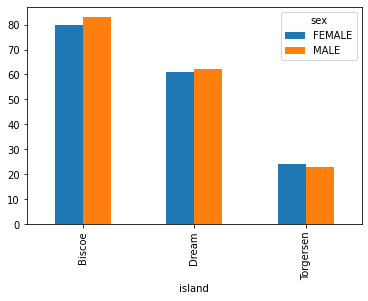

In [ ]:
from matplotlib import pyplot as plt
grouped_data.unstack().plot.bar()


# Задание 6 (2 балла)

1. Считая, что длина ласт пингвина составляет треть его роста, рассчитайте индекс массы тела каждого пингвина. Определите самый крупный вид.
2. В каком количестве популяция этого вида представлена на каждом из островов? Результат покажите на круговой диаграмме.

1.

In [ ]:

penguins_data["height_lenght_mm"] = penguins_data.flipper_length_mm * 3
penguins_data["body_mass_index"] = (penguins_data['body_mass_g']/1000) / ((penguins_data.height_lenght_mm/1000)**2)

result = penguins_data.groupby('species')['body_mass_index'].mean().idxmax()

print("Самый крупный вид: " + str(result))


Самый крупный вид: Gentoo


2.

([<matplotlib.patches.Wedge at 0x7ff87a408810>,
 [Text(1.1, 0.0, 'Torgersen'),
  Text(-1.1, 1.3471114790620887e-16, 'Biscoe'),
  Text(1.1, -2.6942229581241775e-16, 'Dream')])

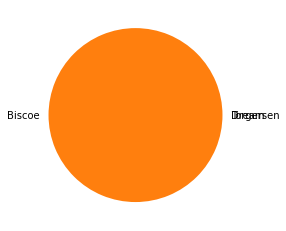

In [ ]:
islands_arr = penguins_data.island.unique()
counts_arr = []
for island in penguins_data.island.unique():
    counts_arr.append(penguins_data[penguins_data.island == island].species[penguins_data.species == result].count())

fig, ax = plt.subplots()
ax.pie(counts_arr, labels=islands_arr)